# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [5]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [6]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [7]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [8]:
df_train.shape

(15223, 52)

In [9]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [10]:
df_test.shape

(14910, 52)

In [11]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [12]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [13]:
df = df_test.append(df_train).reset_index(drop=True)

In [14]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [16]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Неполное среднее', 'Два и более высших образования', 'Высшее', 'Неоконченное высшее', 'Среднее', 'Ученая степень'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Разведен(а)', 'Не состоял в браке', 'Гражданский брак', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Коммунальное хоз-во/Дорожные службы', 'Недвижимость', 'Энергетика', 'Металлургия/Промышленность/Машиностроение', 'Логистика', 'Здравоохранение', 'Информационные технологии', 'Торговля', 'Страхование', 'Другие сферы', 'Ресторанный бизнес/Общественное питание', 'Маркетинг', 'ЧОП/Детективная д-ть', 'Наука', 'Салоны красоты и здоровья', 'СМИ/Реклама/PR-агенства', 'Информационные услуги', 'Строительство', 'Сборочные производства', 'Развлечения/Искусство', 'Образование', 'Банк/Финансы', 'Подбор персонала', 'Нефтегазовая промышленность', 'Химия/Парфюмерия/Фармацевтика', 'Транспорт', 'Туризм', 'Сельское хозяйство', 'Управляющая компания', 'Государственная служба', 'Юридические услуги/нотариальные услуги'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [17]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

PREVIOUS_CARD_NUM_UTILIZED запоняем нулями (по условию задачи). WORK_TIME заполняем наиболее часто встречающимся значением

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Для категориальных оставляем как есть, т.к. проблема решиться при применении get_dummies. 

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [19]:
def preproc_data(df_input):
    df_output = df_input.copy()

    ## Your Code Here
    df_output.drop(columns=['AGREEMENT_RK'], inplace=True)
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output.PREVIOUS_CARD_NUM_UTILIZED.fillna('0').astype('int')
    df_output['WORK_TIME'].fillna(df.WORK_TIME.mean(), inplace=True)
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output = pd.get_dummies(df_output)
       
    return df_output

In [20]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample_train == 1').drop(['sample_test', 'sample_train'], axis=1)
df_test_preproc = df_preproc.query('sample_test == 1').drop(['sample_test', 'sample_train'], axis=1)

In [28]:
df_test_preproc.shape

(14910, 443)

In [29]:
df_test_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,0,30,1,0,1,1,1,7000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,48,0,1,1,0,0,4100.0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0,35,1,0,0,1,0,40000.0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0,22,1,0,0,0,0,20000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,27,1,0,1,2,2,17000.0,1,1,...,1,0,0,0,0,0,0,0,0,0


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [31]:
X = df_train_preproc.drop('TARGET', 1)
y = df_train_preproc.TARGET
X_test = df_test_preproc.drop('TARGET', 1)
y_test = df_test_preproc.TARGET

In [44]:
len(X)==len(y) and len(X_test)==len(y_test)

True

#### Задание 5. Обучение и оценка качества разных моделей

In [48]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\loiko\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [74]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)
predictDTC = dtc.predict(X_test)
predict_probaDTC = dtc.predict_proba(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictRFC = rfc.predict(X_test)
predict_probaRFC = rfc.predict_proba(X_test)

lr = LogisticRegression(penalty='l1')
lr.fit(X_train, y_train)
predictLR = lr.predict(X_test)
predict_probaLR = lr.predict_proba(X_test)

In [75]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
    
print('DecisionTreeClassifier')
print('accuracy', accuracy_score(y_test, predictDTC))
print('precision', precision_score(y_test, predictDTC))
print('recall', recall_score(y_test, predictDTC))
print('\nRandomForestClassifier')
print('accuracy', accuracy_score(y_test, predictRFC))
print('precision', precision_score(y_test, predictRFC))
print('recall', recall_score(y_test, predictRFC))
print('\nLogisticRegression')
print('accuracy', accuracy_score(y_test, predictLR))
print('precision', precision_score(y_test, predictLR))
print('recall', recall_score(y_test, predictLR))

DTCseries = pd.Series([accuracy_score(y_test, predictDTC), 
                       precision_score(y_test, predictDTC), 
                       recall_score(y_test, predictDTC)], 
                      index = ['accuracy', 'precision', 'recall'])

RFCseries = pd.Series([accuracy_score(y_test, predictRFC), 
                       precision_score(y_test, predictRFC), 
                       recall_score(y_test, predictRFC)], 
                      index = ['accuracy', 'precision', 'recall'])

LRseries = pd.Series([accuracy_score(y_test, predictLR), 
                       precision_score(y_test, predictLR), 
                       recall_score(y_test, predictLR)], 
                      index = ['accuracy', 'precision', 'recall'])

DecisionTreeClassifier
accuracy 0.8749726297350559
precision 0.16666666666666666
recall 0.007207207207207207

RandomForestClassifier
accuracy 0.8782570615283556
precision 0.4444444444444444
recall 0.007207207207207207

LogisticRegression
accuracy 0.877819137289249
precision 0.4117647058823529
recall 0.012612612612612612


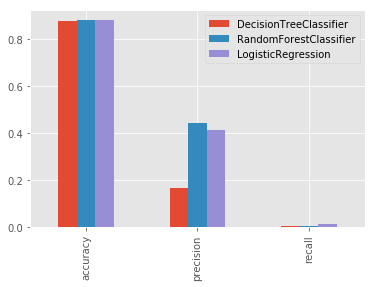

In [76]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

statDF = pd.DataFrame({'DecisionTreeClassifier':DTCseries,
                     'RandomForestClassifier':RFCseries,
                     'LogisticRegression':LRseries})
statDF.plot.bar()

(-0.01, 1.01)

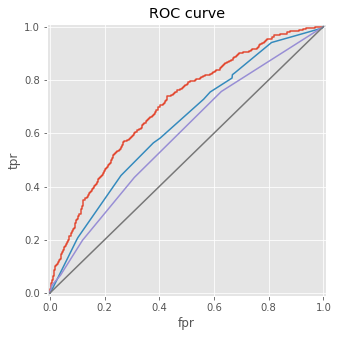

In [77]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_probaLR[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_probaDTC[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, predict_probaRFC[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
## Your Code Here

In [78]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

dtc_score = cross_val_score(
    DecisionTreeClassifier(max_depth = 5),
    X_train,
    y_train,
    scoring='roc_auc',
    cv = 10
).mean()
dtc_score
## Your Code Here

0.6118082367152105

In [79]:
rfc_score = cross_val_score(
    RandomForestClassifier(max_depth = 7),
    X_train,
    y_train,
    scoring='roc_auc',
    cv = 10
).mean()
rfc_score

0.6343304066064375

In [80]:
lr_score = cross_val_score(
    LogisticRegression(penalty='l1'),
    X_train,
    y_train,
    scoring='roc_auc',
    cv = 10
).mean()
lr_score

0.6743893339936748

In [81]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
predict = lr.predict_proba(X_test)

In [82]:
# Померить roc_auc на тесте
roc_auc_score(y_test, predict[:,1])

0.7011034464175042